In [1]:
import numpy as np
import pandas as pd
import netCDF4 as nc
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import xarray as xr

In [21]:
mm5=nc.Dataset('/lcrc/project/RegClimateRisk/plotpy/T700_2003_coarse.nc','r')
print(mm5)

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    history: Sun Mar 28 12:29:16 2021: ncks -d south_north,0,514,5 -d west_east,0,598,5 T700_2003_full.nc T700_2003_full.nc.d
    NCO: netCDF Operators version 4.7.4 (http://nco.sf.net)
    dimensions(sizes): Time(365), south_north(103), west_east(120)
    variables(dimensions): float32 t700(Time,south_north,west_east)
    groups: 



In [22]:
t700 = mm5.variables['t700'][:]

In [60]:
print(t700.shape)
print(np.amax(t700))
print(np.amin(t700))

(365, 103, 120)
270.6355
293.5845
219.34479


In [23]:
mm7=nc.Dataset('/lcrc/project/RegClimateRisk/plotpy/xlat_xlon.nc','r')
print(mm7)

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    TITLE:  OUTPUT FROM WRF V3.3.1 MODEL
    START_DATE: 2003-12-25_06:00:00
    SIMULATION_START_DATE: 2003-01-01_06:00:00
    WEST-EAST_GRID_DIMENSION: 600
    SOUTH-NORTH_GRID_DIMENSION: 516
    BOTTOM-TOP_GRID_DIMENSION: 38
    DX: 12000.0
    DY: 12000.0
    GRIDTYPE: C
    DIFF_OPT: 1
    KM_OPT: 4
    DAMP_OPT: 0
    DAMPCOEF: 0.2
    KHDIF: 0.0
    KVDIF: 0.0
    MP_PHYSICS: 6
    RA_LW_PHYSICS: 4
    RA_SW_PHYSICS: 4
    SF_SFCLAY_PHYSICS: 1
    SF_SURFACE_PHYSICS: 2
    BL_PBL_PHYSICS: 1
    CU_PHYSICS: 3
    SURFACE_INPUT_SOURCE: 1
    SST_UPDATE: 1
    GRID_FDDA: 2
    GFDDA_INTERVAL_M: 360
    GFDDA_END_H: 8759
    GRID_SFDDA: 0
    SGFDDA_INTERVAL_M: 0
    SGFDDA_END_H: 0
    SF_URBAN_PHYSICS: 0
    FEEDBACK: 1
    SMOOTH_OPTION: 0
    SWRAD_SCAT: 1.0
    W_DAMPING: 0
    MOIST_ADV_OPT: 1
    SCALAR_ADV_OPT: 1
    TKE_ADV_OPT: 1
    DIFF_6TH_OPT: 0
    DIFF_6TH_FACTOR: 0.1

In [24]:
lat = mm7.variables['XLAT'][:]
lon = mm7.variables['XLONG'][:]

In [25]:
print(np.amax(lat))
print(np.amax(lon))
print(np.amin(lat))
print(np.amin(lon))

77.92214
179.98785
17.330208
-179.91275


In [74]:
print(lon[0,0,0])
print(lon[0,0,119])

-138.48502
-74.19562


In [84]:
# must remove the 5 left (westmost) longitude steps for plotting. 
t700_mod=t700[:,0:102,5:119] 

In [30]:
import matplotlib.ticker as mticker
import matplotlib as mpl
from matplotlib.colors import BoundaryNorm 
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cmaps

In [51]:
# Set your data coordinates
datacrs = ccrs.Mercator() 
# Set the map projection
mapcrs = ccrs.Mercator() 

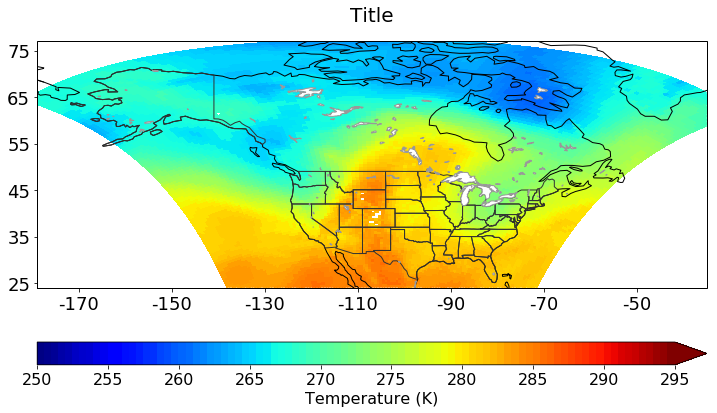

In [91]:
plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

#ax.set_global()
ax.set_extent([-179, -35,24, 77], crs=ccrs.PlateCarree())
ax.coastlines()

ax.add_feature(cfeature.STATES, edgecolor='0.2')  

clevs_20=np.arange(250,295.5,.5) # (start,stop,step)
mycmap=cmaps.MPL_jet  
mynorm=BoundaryNorm(clevs_20,ncolors=mycmap.N,clip=True)   #This normalizes the intervals

rr = ax.pcolormesh(lon[0,0:102,5:119], lat[0,0:102,5:119], t700_mod[170,:,:],shading='auto',cmap=mycmap,norm=mynorm)  #gist_stern afmhot didn't use transform, but looks ok...

cbar = plt.colorbar(rr, orientation='horizontal', pad=.1,shrink=1, aspect=28,extend='max',ticks=[250,255,260,265,270,275,280,285,290,295]) #,,,ticks=[-5,-4,-3,-2,-1,0,1,2,3,4,5]ticks=[0,5,10,15,20]label='number of days'),ticks=[0,.1,.2,.3,.4,.5,.6]
cbar.set_label(label='Temperature (K)', fontsize=16)
cbar.ax.tick_params(labelsize=16) 
cbar.ax.set_xticklabels(['250', '255', '260','265','270','275','280','285','290', '295'])
plt.title('Title',fontsize=20,pad=20) 

yticks = ax.get_yticks()
xticks = ax.get_xticks()

ax.add_feature(cfeature.NaturalEarthFeature('physical', 'lakes', '50m', edgecolor='0.6', facecolor='white'))

ax.set_xticks([-170,-150,-130,-110,-90,-70,-50], crs=ccrs.PlateCarree()) 
ax.set_yticks([25,35,45,55,65,75], crs=ccrs.PlateCarree())
ax.set_xticklabels([-170,-150,-130,-110,-90,-70,-50],fontsize=18)
ax.set_yticklabels([25,35,45,55,65,75], fontsize=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# To save the fig as png file
#filename = '.png'
#plt.savefig(filename)

plt.show()